In [1]:
import pandas as pd
import numpy as np
import nltk

In [3]:
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('vader_lexicon')

### Datasets URL
https://github.com/skathirmani/datasets
- narendra modi tweets
- amazon reviews
- hotstar reviews
- imdb sentiment
- 

In [5]:
url = 'https://raw.githubusercontent.com/skathirmani/datasets/master/narendramodi_tweets.csv'
modi = pd.read_csv(url)
modi.shape

(3220, 14)

In [10]:
#modi.info()
modi['created_at'] = pd.to_datetime(modi['created_at'])
#modi.info()
modi['created_at'].min(), modi['created_at'].max()

(Timestamp('2016-03-09 12:22:10'), Timestamp('2017-01-31 11:00:07'))

In [12]:
# !pip install wordcloud

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

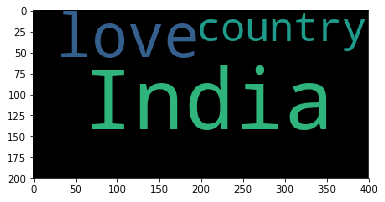

In [15]:
wc = WordCloud().generate('i love India. India is my country')
plt.imshow(wc)

In [16]:
modi.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [18]:
x = ['a', 'b', 'c', 'd']
# abcd, a-b-c-d
''.join(x), '-'.join(x)

('abcd', 'a-b-c-d')

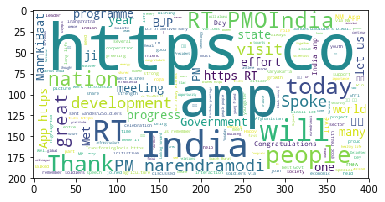

In [20]:
wc = WordCloud(background_color='white').generate(' '.join(modi['text']))
plt.imshow(wc)

## Bag of word analysis

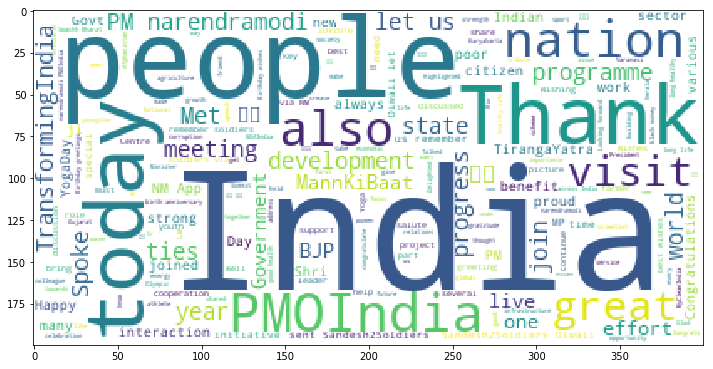

In [26]:
stopwords = nltk.corpus.stopwords.words('english')
type(stopwords)
len(stopwords)
stopwords.extend(['https', 'co', 'amp', 'RT'])
wc = WordCloud(background_color='white',
              stopwords=stopwords).generate(' '.join(modi['text']))
plt.figure(figsize=(12,10))
plt.imshow(wc)

## Text cleaning
- Convert everything to lower case
- Remove stopwords
- Remove special characters
- Identify root of the words

#### Convert all characters to lower case

In [27]:
docs = modi['text'].str.lower()
docs.head()

0    the president's address wonderfully encapsulat...
1    rashtrapati ji's address to both houses of par...
2    rt @pmoindia: empowering the marginalised. htt...
3    rt @pmoindia: commitment to welfare of farmers...
4    rt @pmoindia: improving the quality of life fo...
Name: text, dtype: object

#### Apply regular expression to retain only alphaters, hash symbol and @ symbol

In [38]:
x = pd.Series(['this is a sentence with numbers 123',
               'this is a sentence with special characters $#@!@',
               'THIS is a sentence WITH MiX cases'])
x.str.replace('a', '-')
x.str.replace('a', '')
x.str.replace('[0-9]', '')
x.str.replace('[a-z]', '')
x.str.replace('[0-9]', '')
x.str.replace('[a-zA-Z]', '')
x.str.replace('[a-zA-Z0-9]', '')
x.str.replace('[^a-z]', '')
x.str.replace('[^a-z ]', '')
x.str.replace('[^a-z #@]', '')

0                  this is a sentence with numbers 
1    this is a sentence with special characters #@@
2                            is a sentence  i cases
dtype: object

In [40]:
docs_clean = docs.str.replace('[^a-z #@]', '')
docs_clean.head(2)

0    the presidents address wonderfully encapsulate...
1    rashtrapati jis address to both houses of parl...
Name: text, dtype: object

In [61]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['https', 'rt', 'co', 'amp'])

stemmer = nltk.stem.PorterStemmer()
stemmer.stem('playing')
stemmer.stem('played')
x = ['play', 'playing', 'played', 'plays']
x = ['quality', 'qualities', 'qualitative']
[stemmer.stem(word) for word in x]

['qualiti', 'qualiti', 'qualit']

In [52]:
sample = docs_clean.head(2)

In [55]:
for tweet in sample:
    print(tweet)
    words = tweet.split(' ')
    print(words)
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    text_clean = ' '.join(words_clean)
    print(words_clean)
    print(text_clean)
    print('------')

the presidents address wonderfully encapsulated indias strengths aspirations potential amp the efforts towards #transformingindia
['the', 'presidents', 'address', 'wonderfully', 'encapsulated', 'indias', 'strengths', 'aspirations', 'potential', 'amp', 'the', 'efforts', 'towards', '#transformingindia']
['presid', 'address', 'wonder', 'encapsul', 'india', 'strength', 'aspir', 'potenti', 'effort', 'toward', '#transformingindia']
presid address wonder encapsul india strength aspir potenti effort toward #transformingindia
------
rashtrapati jis address to both houses of parliament was indepth amp extensive do hear httpstcordkqtjgnnx @rashtrapatibhvn
['rashtrapati', 'jis', 'address', 'to', 'both', 'houses', 'of', 'parliament', 'was', 'indepth', 'amp', 'extensive', 'do', 'hear', 'httpstcordkqtjgnnx', '@rashtrapatibhvn']
['rashtrapati', 'ji', 'address', 'hous', 'parliament', 'indepth', 'extens', 'hear', 'httpstcordkqtjgnnx', '@rashtrapatibhvn']
rashtrapati ji address hous parliament indepth ex

In [60]:
docs_clean = modi['text'].str.lower().str.replace('[^a-z #@]', '')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['https', 'rt', 'co', 'amp'])

stemmer = nltk.stem.PorterStemmer()
def clean_sentence(doc):
    words = doc.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    doc_clean = ' '.join(words_clean)
    return doc_clean
docs_clean = docs_clean.apply(clean_sentence)
docs_clean.head()

0    presid address wonder encapsul india strength ...
1    rashtrapati ji address hous parliament indepth...
2          @pmoindia empow marginalis httpstcowwsqgwdk
3     @pmoindia commit welfar farmer httpstcopaafrfmrc
4    @pmoindia improv qualiti life poor httpstcougmvkz
Name: text, dtype: object

In [76]:
len(stopwords)

183

## Document Term Matrix

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [78]:
import sklearn
sklearn.__version__

'0.19.1'

In [63]:
vectorizer.fit(docs_clean)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [67]:
len(vectorizer.get_feature_names())

7339

In [68]:
dtm = vectorizer.transform(docs_clean)
dtm

<3220x7339 sparse matrix of type '<class 'numpy.int64'>'
	with 31586 stored elements in Compressed Sparse Row format>

In [70]:
tot_values = 3220 * 7339
non_zero_values = 31586
non_zero_values / tot_values * 100
(tot_values-non_zero_values) / tot_values * 100

99.8663398723234

In [75]:
df_dtm = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names())
df_dtm.shape

(3220, 7339)

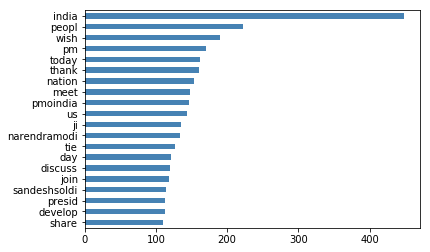

In [84]:
df_dtm.sum().sort_values(ascending=False).head(20)[::-1].plot.barh(color='steelblue')

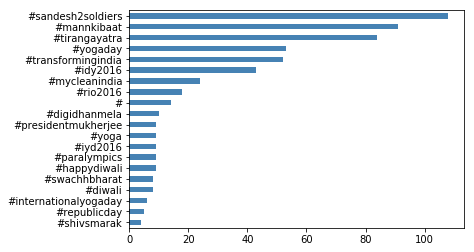

In [95]:
hashtags = []
for doc in modi['text'].str.lower().str.replace('[^#a-z0-9 ]', ''):
    words = doc.split(' ')
    tweet_hashtags = [word for word in words if word.startswith('#')]
    hashtags.extend(tweet_hashtags)
pd.Series(hashtags).value_counts().head(20)[::-1].plot.barh(color='steelblue')

In [ ]:
https://www.kaggle.com/c/quora-insincere-questions-classification/submit

In [98]:
## Excercise
### Read IMDB sentiments data (imdb_sentiment.csv)
url = 'https://bit.ly/2S2yXEd'
imdb = pd.read_csv(url)

### Steps
- Split the data in to train and testing. (20% for testing)
- Clean the data set
- Fit a Random Forest and Multinominal Naive Bayes model
- Compare the accuracy